In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/csv/haberman.csv"

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
labels = ['age', 'operation_year', 'axil_nodes', 'survived_status']
df = pd.read_csv(path, names = labels)
df.head()

,age,operation_year,axil_nodes,survived_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


In [5]:
df.shape
df=df.drop([0,0])
df['age'] = df['age'].astype('int32')
df['axil_nodes'] = df['axil_nodes'].astype('int32')
df['operation_year'] = df['operation_year'].astype('int32')

In [6]:
df.head()

,age,operation_year,axil_nodes,survived_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


In [7]:
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'survived_status'], dtype='object')

In [8]:
df.describe()


,age,operation_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
df.head()

,age,operation_year,axil_nodes,survived_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


In [10]:
df.tail()

,age,operation_year,axil_nodes,survived_status
302,75,62,1,1
303,76,67,0,1
304,77,65,3,1
305,78,65,1,2
306,83,58,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              306 non-null    int32 
 1   operation_year   306 non-null    int32 
 2   axil_nodes       306 non-null    int32 
 3   survived_status  306 non-null    object
dtypes: int32(3), object(1)
memory usage: 8.4+ KB


NO missing values were found in our dataset but from here we can map 1 means alive and 2 means dead as he is not survived.

In [12]:

df['survived_status'] = df['survived_status'].map(lambda x: 'Survived' if x=='1' else 'dead')

In [13]:
df.tail()


,age,operation_year,axil_nodes,survived_status
302,75,62,1,Survived
303,76,67,0,Survived
304,77,65,3,Survived
305,78,65,1,dead
306,83,58,2,dead


In [14]:
df['survived_status'].value_counts()

Survived    225
dead         81
Name: survived_status, dtype: int64

From here we see that the dataset is not balanced i.e 225 people lived for 5 or more years and 81 people lived 5 years or less.

In [15]:
status1 = df.loc[df['survived_status'] == 'Survived']
status2 = df.loc[df['survived_status'] == 'dead']

In [16]:
status1.describe()

,age,operation_year,axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


1)The average value of age for the patients who survived after the surgery is 52.017778.
2)The average no of nodes for the patients who survived after the surgery is 2.79.
3)The average no of nodes for the patients who survived after the surgery is 2.79.
4)50% of people who survived have nodes = 0.
5)No one above age of 77 survived.
6)No one with node count above 46 survived.

In [17]:
status2.describe()

,age,operation_year,axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


1)The average no of nodes in person who could not survive was 7.4.

2)75% of people above node count 1 could not survive.

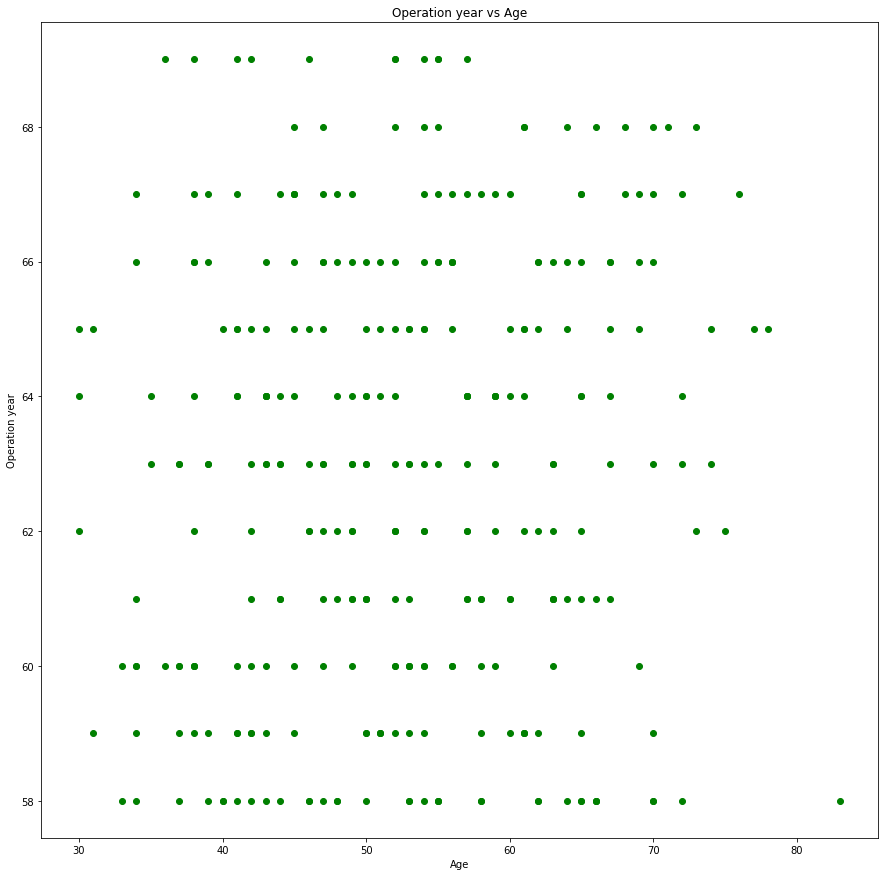

In [18]:
plt.figure(figsize=(15,15 ))
plt.scatter(df['age'],df['operation_year'], c = 'g')
plt.xlabel('Age')
plt.ylabel('Operation year')
plt.title('Operation year vs Age')
plt.show()

We cannot infer much from the above plot.But we can say that most of the people taking operation lie in the range of 40 to 70.

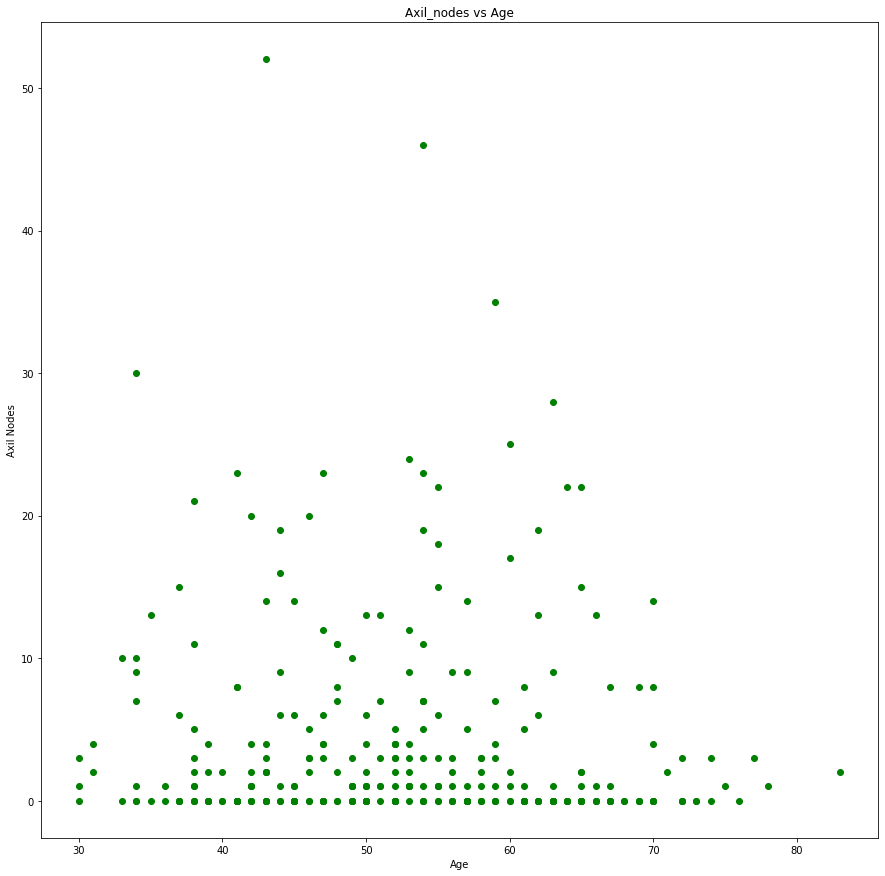

In [19]:
plt.figure(figsize=(15,15 ))
plt.scatter(df['age'],df['axil_nodes'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil_nodes vs Age')
plt.show()

We can see that there is quite good concentration of data point When axil_node is 0

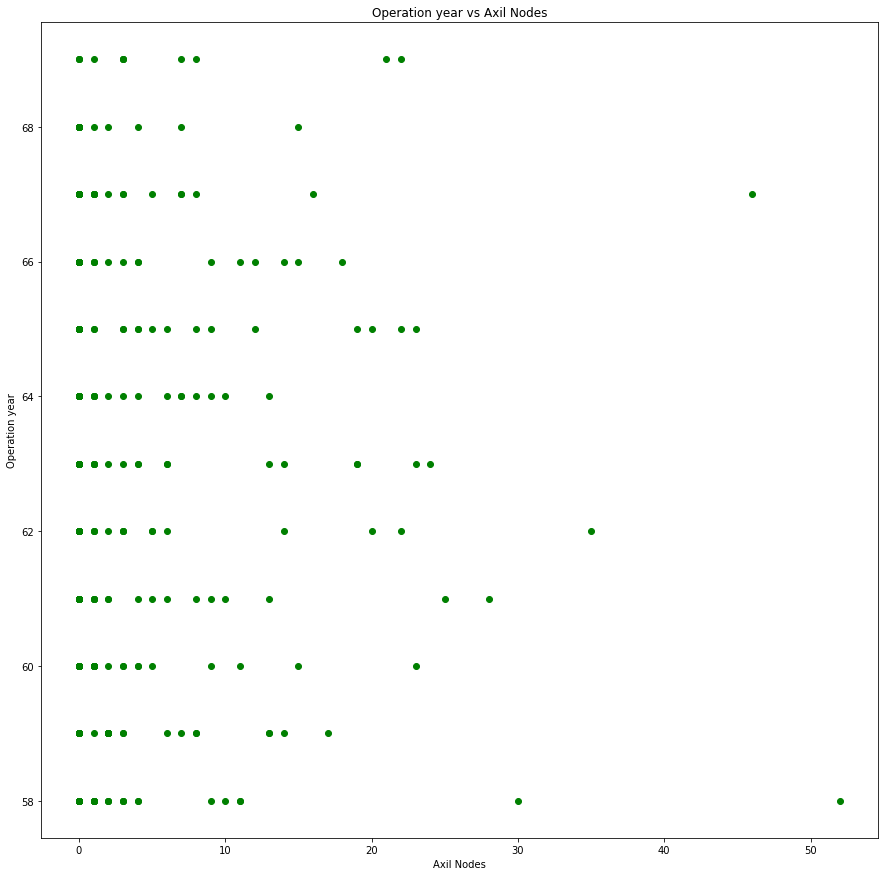

In [20]:
plt.figure(figsize=(15,15 ))
plt.scatter(df['axil_nodes'], df['operation_year'], c = 'g')
plt.xlabel('Axil Nodes')
plt.ylabel('Operation year')
plt.title('Operation year vs Axil Nodes')
plt.show()

From here we can conclude that large number of operation can be done in the year 1960 to 1968.

In [21]:
df.columns[:-1]
df.describe()
df

,age,operation_year,axil_nodes,survived_status
1,30,64,1,Survived
2,30,62,3,Survived
3,30,65,0,Survived
4,31,59,2,Survived
5,31,65,4,Survived
...,...,...,...,...
302,75,62,1,Survived
303,76,67,0,Survived
304,77,65,3,Survived
305,78,65,1,dead


Changing the datatype since numeric datatype is required for plotting the graph.

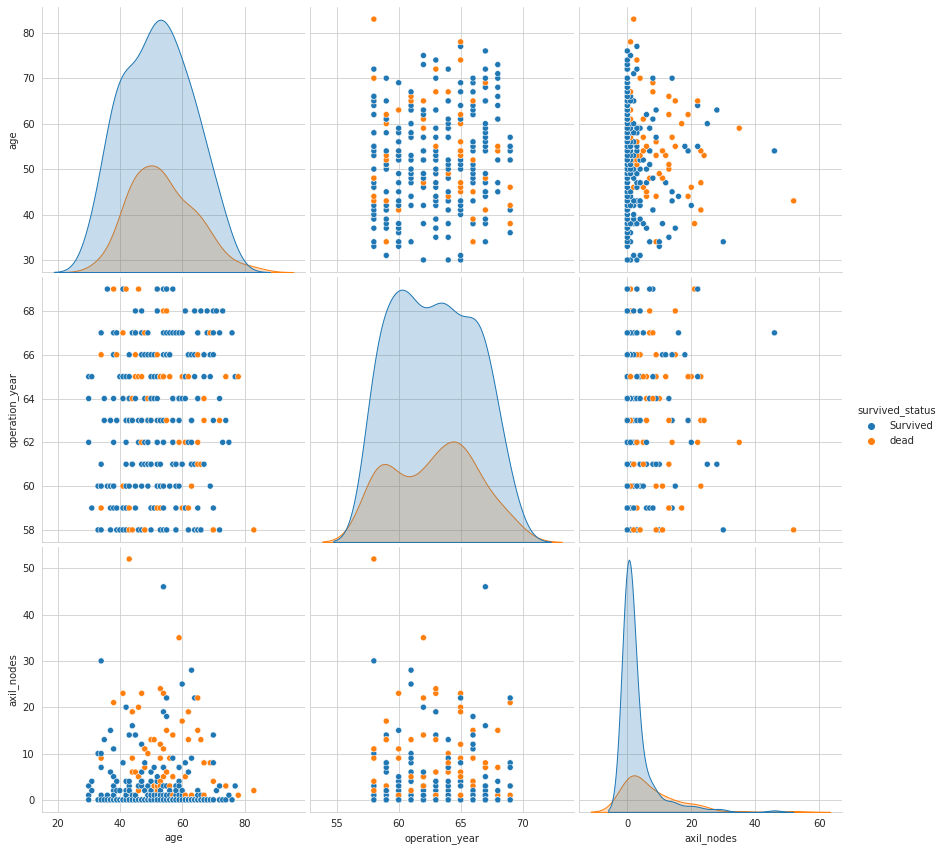

In [22]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue = 'survived_status',vars=['age', 'operation_year', 'axil_nodes'], height = 4)
plt.show()

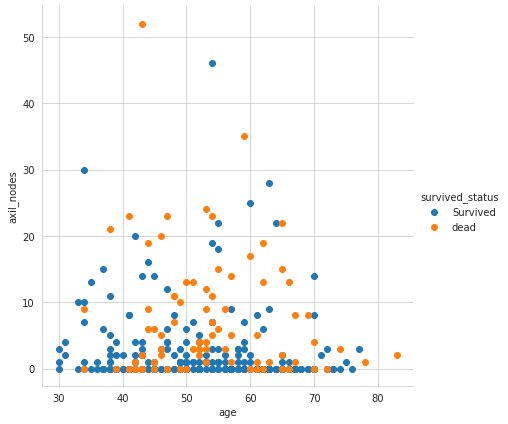

In [23]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue = 'survived_status', height = 6)\
   .map(plt.scatter, 'age', 'axil_nodes')\
   .add_legend();
plt.show();



Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age.

It is very much less likely to have patients with axil nodes more than 30.

Patients who are older than 50 and have axil nodes greater than 10 are more likely to die.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


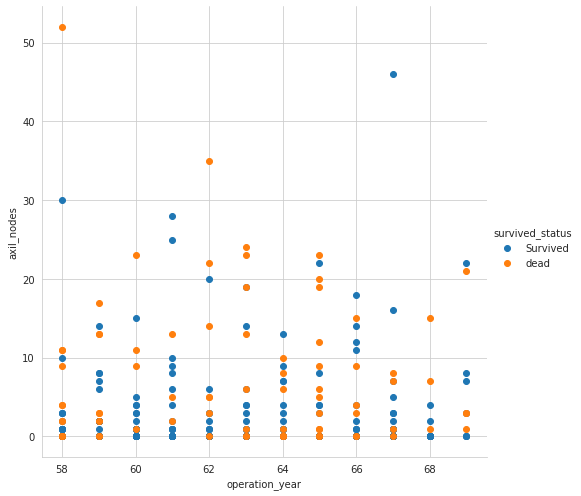

In [24]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survived_status', size = 7) \
    .map(plt.scatter, 'operation_year', 'axil_nodes') \
    .add_legend();
plt.show()

Most of the operation were unsuccesfull in year 1965.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


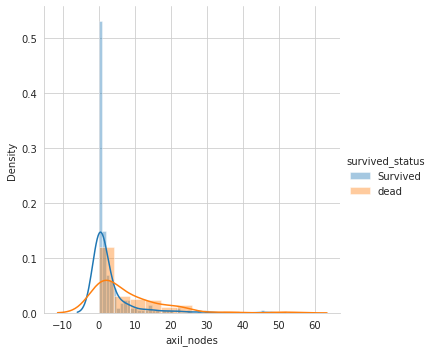

In [25]:
sns.FacetGrid(df, hue='survived_status', height = 5) \
    .map(sns.distplot, 'axil_nodes') \
    .add_legend();
plt.show();

We can conclude that from this histogram (axil_node) that, Patients having 0 axil nodes are more likely to survive

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


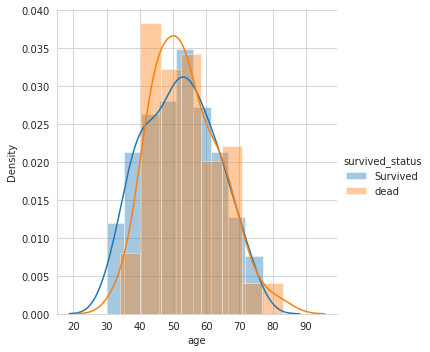

In [26]:
sns.FacetGrid(df, hue='survived_status', size = 5) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show();

1.This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.

2.People less than age 40 are more likely to survive

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


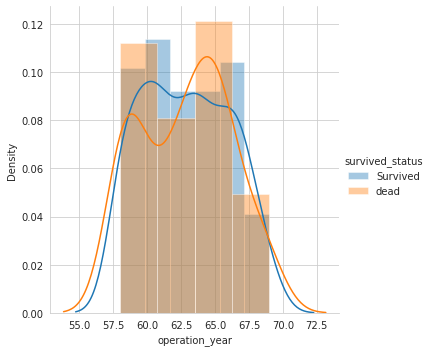

In [27]:
sns.FacetGrid(df, hue='survived_status', size = 5) \
    .map(sns.distplot, 'operation_year') \
    .add_legend();
plt.show();

Large number of patients died whos operation was done in year 60 and 65



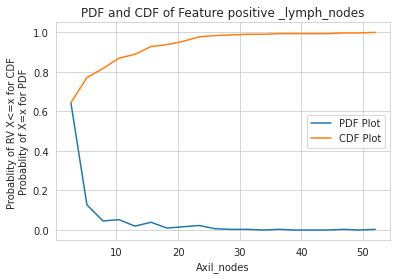

In [28]:
counts, bin_edges = np.histogram(df['axil_nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF Plot')
plt.plot(bin_edges[1:], cdf, label='CDF Plot')
plt.legend()
plt.xlabel('Axil_nodes')
plt.ylabel('Probablity of RV X<=x for CDF \nProbablity of X=x for PDF')
plt.title("PDF and CDF of Feature positive _lymph_nodes")
plt.show()

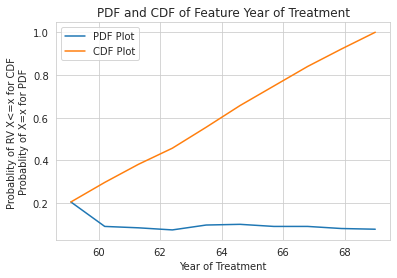

In [29]:
counts, bin_edges = np.histogram(df['operation_year'], bins=10, density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF Plot')
plt.plot(bin_edges[1:], cdf, label='CDF Plot')
plt.legend()
plt.xlabel('Year of Treatment')
plt.ylabel('Probablity of RV X<=x for CDF \nProbablity of X=x for PDF')
plt.title("PDF and CDF of Feature Year of Treatment")
plt.show()

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


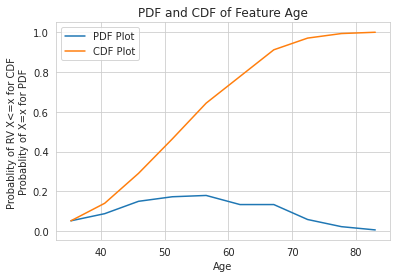

In [30]:
counts, bin_edges = np.histogram(df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
# print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF Plot')
plt.plot(bin_edges[1:], cdf, label='CDF Plot')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probablity of RV X<=x for CDF \nProbablity of X=x for PDF')
plt.title("PDF and CDF of Feature Age")
plt.show()

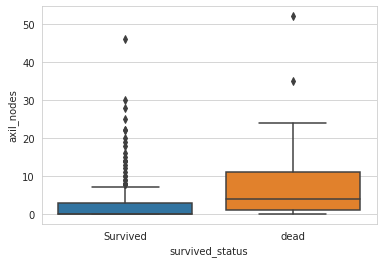

In [31]:
sns.boxplot(x='survived_status', y = 'axil_nodes', data=df)
plt.show()

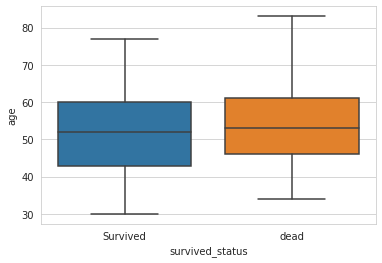

In [32]:
sns.boxplot(x='survived_status', y = 'age', data=df)
plt.show()

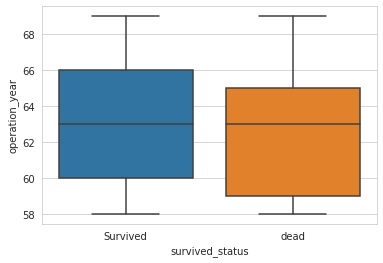

In [33]:
sns.boxplot(x='survived_status', y = 'operation_year', data=df)
plt.show()

Box plot shows that, the more number of axil nodes, the more patients likely to die

The patients who had axil nodes from 1 to 24 are the majority of patients who died.

In [34]:
df.describe()

,age,operation_year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


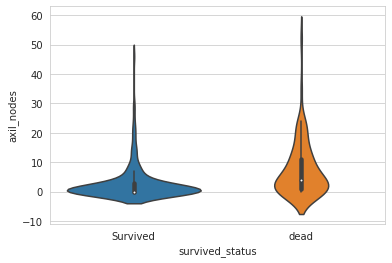

In [35]:
sns.violinplot(x='survived_status', y='axil_nodes', data = df, size = 9)
plt.show()


Looking at the violin plot, we can see that the vast majority of patients who 
survived had no axil nodes or didn't have any at all.

Patients who died had an axil node greater than or equal to 1, and as the concentration of axil nodes increases, the probability of death increases.

<h1>Final Conclusion<h1>

<h2>From Pair Plot</h2>

<li>The probability of survival is very high if there are no axil nodes (nearly 100%).</li>

<h2>Scatter Plot</h2>

<li>
From this dataset, we can conclude that the majority of operations are performed on patients aged 38 to 68, and most of the points plotted on the scatter plot relate to this age range (Operation_year versus Age).
</li>

<li>In this dataset, Axil_nodes are the most important factor, because those who had more than one Axil node are more likely to die.</li>

<li>It could also be said that age is somewhat important in this dataset, as patients under the age of 40 are more likely to survive, regardless of whether they have an axil node greater than 1.
</li>

<h2>From PDF and CDF</h2>
<h3>PDF for Age</h3>
<li>There are greater chances of survival after surgery at 20-40 years of age.</li>
<li>Among young adults 20- 40, survival carries a marginal advantage over non-survival, 40-60, non-survival carries a marginal advantage, and 60-70, there are 50-50 chances of surviving.</li>

<h3> PDF for No. of Axil Nodes</h3>

<li>A person with zero node density has a significantly better chance of surviving.</li>
<li>With increase in node count the no of survivals is always less then the non survivals.</li>
<h3>PDF curves for Year of Surgery</h3>

<li>People who undergo surgery at the age of 60 have better survival chances than those who undergo the surgery at 65.</li>


<h3>Pdf and Cdf Age Comparison</h3>

<li>In the above graph, it can be seen that the people under 38 usually survive after breast cancer surgery, while those aged between 38 and 42 have a much higher chance of surviving.</li>
<li>Surviving from 42 to 56 is likely to be significantly less common.</li>

<h3> Box Plots</h3>
<li> Age group 30-34 have 100% survival rate.</li>
<li>After surgery, people in the age group 78 and older are unlikely to live five years.</li>
<li>The no of patients with nodes above 8 are very less and and stand as outliers to the median values.</li>

<h3>Violin Plot</h3>
<li>50 percentile of people surviving have node value equal to 0.</li>


<h2>Observation</h2>
<li>People with age between 30 and 40 operated in 1958,1960,1961,1962,1963,1964,1965,1967,1969 have survived.</li>
<li>Age group 30-34 have 100% survival rate.</li>
<li>People with lymph node greater than 50 could not survive.</li>
<li>The number of deaths has been higher among patients with axil nodes greater than 1, and it has been shown that as the number of nodes grows, the likelihood of death increases.</li>
<li>Patients with axil nodes from 1 to 24 died the majority of the time.</li>


<!-- <h2>Statistical Analysis</h2> -->
<li>Survival is most concentrated in age group 50-55 and node counts equal to 0.</li>
<li>Age between 55 to 60 and node count more then 30 leads to death before completion of 5 years of surgery.</li>
<li>During 1962-1965 the chances of survival were 50 percent approx.</li>
<li>The Patients survived- 225 , then the one who died -81 after 5 years of surgery.</li>
<h1>Feature Importance:</h1>

<li>In this dataset, Axil_nodes are the most important factor, because those who had more than one Axil node are more likely to die.</li>

<li>It could also be said that age is somewhat important in this dataset, as patients under the age of 40 are more likely to survive, regardless of whether they have an axil node greater than 1.</li>